### About Tumors

Tumors are abnormal growths in your body. They are made up of extra cells. Normally, cells grow and divide to form new cells as your body needs them. When cells grow old, they die, and new cells take their place. Sometimes, this process goes wrong. New cells form when your body does not need them, and old cells do not die when they should. When these extra cells form a mass, it is called a tumor. 

Tumors can be either **benign** or **malignant**. Benign tumors aren't cancer. Malignant ones are. Benign tumors grow only in one place. They cannot spread or invade other parts of your body. Even so, they can be dangerous if they press on vital organs, such as your brain.

## key differences between benign and malignant tumors?
<img src="benign_malignant.png" />

### Problem solving approach

This dataset contains information on 569 breast tumors and the mean, standard error and worst measures for 10 different properties. I start with an EDA analysing each properties' distribution, followed by the pair interactions and then the correlations with our target.

After the EDA I set up 8 out-of-the-box models for a first evaluation and use stratified cross-validation to measure them. I use **Recall** instead of **Accuracy or F1-Score** since I want to detect all malignant tumors. 

After the first results I analyse features importances, do a single round of feature selection and evaluate the models again. At the end I analyse model errors from the 8 first models I choosen 5 models for fine tuning: 
**Logistic Regression, SVC, Random Forest, Gradient Boosting and KNN.**

Then I proceed to tune the top 2 models using **GridSearchCV** and prepare the data for model by predicting probabilities for both train and test sets.





# Dataset


### General Information

- Original format: csv
- Dataset shape: 569 x 33 (rows x columns)
- There are no null values in this data.
- The values are in different scales

### Features information

For each sample ten properties were measured:

<ol>
    <li><b>Radius</b> - Mean distances from center to points on the perimeter</li>
    <li><b>Texture</b> - Standard deviation of gray scale values</li>
    <li><b>Perimeter</b></li>
    <li><b>Area</b></li>
    <li><b>Smoothness</b> - Local variation in radius lengths</li>
    <li><b>Compactness</b> - Perimeter^2/Area - 1</li>
    <li><b>Concavity</b> - Severity of concave portions of the contour</li>
    <li><b>Concave points</b> - Number of concave portions of the contour</li>
    <li><b>Simmetry</b></li>
    <li><b>Fractal Dimension</b> - Coastline approximation - 1 </li>
</ol>


And for each of these properties we have three calculated values:
- **Mean**
- **Standard Error**
- **Worst** (Average of the 3 largest values)

All the measures are float types.

### Target

Our target is the categorical column either B (benign) or M (malignant).<br>
There are 357 benign classes and 212 malignant classes - roughly **37% malignant tumors**.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
pd.set_option('display.max_columns', 40)

bc_df = pd.read_csv('data.csv')
bc_df.sample(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
21   8510824         B        9.504         12.44           60.34      273.9   
40    855167         M       13.440         21.58           86.18      563.0   
444  9110127         M       18.030         16.85          117.50      990.0   
340    89813         B       14.420         16.54           94.15      641.2   
358  9010333         B        8.878         15.49           56.74      241.0   
434   908469         B       14.860         16.94           94.89      673.7   
406   905189         B       16.140         14.86          104.30      800.0   
546   922577         B       10.320         16.35           65.31      324.9   
35    854253         M       16.740         21.59          110.10      869.5   
276  8911230         B       11.330         14.16           71.79      396.6   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
21           0.10240           0.06492        0.029560             0.020760   
40           0.08162           0.06031        0.031100             0.020310   
444          0.08947           0.12320        0.109000             0.062540   
340          0.09751           0.11390        0.080070             0.042230   
358          0.08293           0.07698        0.047210             0.023810   
434          0.08924           0.07074        0.033460             0.028770   
406          0.09495           0.08501        0.055000             0.045280   
546          0.09434           0.04994        0.010120             0.005495   
35           0.09610           0.13360        0.134800             0.060180   
276          0.09379           0.03872        0.001487             0.003333   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
21          0.1815                 0.06905     0.2773      0.9768   
40          0.1784                 0.05587     0.2385      0.8265   
444         0.1720                 0.05780     0.2986      0.5906   
340         0.1912                 0.06412     0.3491      0.7706   
358         0.1930                 0.06621     0.5381      1.2000   
434         0.1573                 0.05703     0.3028      0.6683   
406         0.1735                 0.05875     0.2387      0.6372   
546         0.1885                 0.06201     0.2104      0.9670   
35          0.1896                 0.05656     0.4615      0.9197   
276         0.1954                 0.05821     0.2375      1.2800   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
21          1.909    15.70       0.009606        0.014320      0.019850   
40          1.572    20.53       0.003280        0.011020      0.013900   
444         1.921    35.77       0.004117        0.015600      0.029750   
340         2.677    32.14       0.004577        0.030530      0.038400   
358         4.277    30.18       0.010930        0.028990      0.032140   
434         1.612    23.92       0.005756        0.016650      0.014610   
406         1.729    21.83       0.003958        0.012460      0.018310   
546         1.356    12.97       0.007086        0.007247      0.010120   
35          3.008    45.19       0.005776        0.024990      0.036950   
276         1.565    17.09       0.008426        0.008998      0.001487   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
21            0.014210      0.02027              0.002968        10.230   
40            0.006881      0.01380              0.001286        15.930   
444           0.009753      0.01295              0.002436        20.380   
340           0.012430      0.01873              0.003373        16.670   
358           0.015060      0.02837              0.004174         9.981   
434           0.008281      0.01551              0.002168        16.310   
406           0.008747      0.01500              0.001621        17.710   
546           0.005495      0.01560              0.002606        11.250  

### Importing CommonHelper class


In [3]:
import os, importlib, sys

def callfunc(file_name, func_name, *args):
    pathname, filename = os.path.split(file_name)
    sys.path.append(os.path.abspath(pathname))
    modname = os.path.splitext(filename)[0]
    module = importlib.import_module(modname)
    result = getattr(module, func_name)(*args)
    return result

common_functions = callfunc(os.getcwd()+"/CommonHelper.py", "CommonHelper", bc_df)

In [4]:
common_functions.describe_data()

checking missing data information: 

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concav

In [5]:
common_functions.missing_info()

Unnamed: 32 --------- float64 ------------ 100.0 %


Removed 'id' and 'Unnamed: 32' columns from dataframe 

In [6]:
bc_df = common_functions.drop_columns(['id','Unnamed: 32'])

In [7]:
bc_df.tail()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
564         0.1726                 0.05623     1.1760       1.256   
565         0.1752                 0.05533     0.7655       2.463   
566         0.1590                 0.05648     0.4564       1.075   
567         0.2397                 0.07016     0.7260       1.595   
568         0.1587                 0.05884     0.3857       1.428   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
564         7.673   158.70       0.010300         0.02891       0.05198   
565         5.203    99.04       0.005769         0.02423       0.03950   
566         3.425    48.55       0.005903         0.03731       0.04730   
567         5.772    86.22       0.006522         0.06158       0.07117   
568         2.548    19.15       0.007189         0.00466       0.00000   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
564            0.02454      0.01114              0.004239        25.450   
565            0.01678      0.01898              0.002498        23.690   
566            0.01557      0.01318              0.003892        18.980   
567            0.01664      0.02324              0.006185        25.740   
568            0.00000      0.02676              0.002783         9.456   

     texture_worst  perimeter_worst  area_worst  smoothness_worst  \
564          26.40           166.10      2027.0           0.14100   
565          38.25           155.00      1731.0           0.11660   
566          34.12           126.70      1124.0           0.11390   
567          39.42           184.60      1821.0           0.16500   
568          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  
564                  0.07115  
565                  0.06637  
566                  0.07820  
567                  0.12400  
568                  0.07039

In [8]:
bc_df = common_functions.target_mapping(target_col='diagnosis',map_dic={'B':0, 'M':1})

In [9]:
# For visualization purpose gathered same group of features
mean_feats = np.concatenate([['diagnosis'], bc_df.iloc[:,1:11].columns.tolist()])
error_feats = np.concatenate([['diagnosis'], bc_df.iloc[:,11:21].columns.tolist()])
worst_feats = np.concatenate([['diagnosis'], bc_df.iloc[:,21:31].columns.tolist()])

In [10]:
mean_feats, error_feats, worst_feats

(array(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
        'area_mean', 'smoothness_mean', 'compactness_mean',
        'concavity_mean', 'concave points_mean', 'symmetry_mean',
        'fractal_dimension_mean'], dtype='<U22'),
 array(['diagnosis', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
        'smoothness_se', 'compactness_se', 'concavity_se',
        'concave points_se', 'symmetry_se', 'fractal_dimension_se'],
       dtype='<U20'),
 array(['diagnosis', 'radius_worst', 'texture_worst', 'perimeter_worst',
        'area_worst', 'smoothness_worst', 'compactness_worst',
        'concavity_worst', 'concave points_worst', 'symmetry_worst',
        'fractal_dimension_worst'], dtype='<U23'))

In [11]:
# Target distribution in data
common_functions.target_distribution(target_col='diagnosis')

B    357
M    212
Name: diagnosis, dtype: int64


B    0.627417
M    0.372583
Name: diagnosis, dtype: float64


AxesSubplot(0.125,0.125;0.775x0.755)


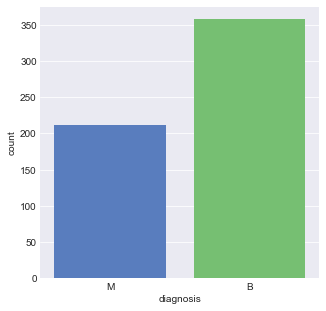

In [12]:
common_functions.show_countplots(column_names=['diagnosis'])

## Split data into Train/Test sets

In [13]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(bc_df, test_size=0.3,stratify=bc_df['Target'], random_state=123)

In [14]:
train_count = train.diagnosis.value_counts(normalize=True)
test_count = test.diagnosis.value_counts(normalize=True)
pd.concat([train_count,test_count],axis=1)

diagnosis  diagnosis
B   0.628141   0.625731
M   0.371859   0.374269

## EDA

In [15]:
# Importing EDA helper functions class
eda_helper = callfunc(os.getcwd()+"/EDAHelper.py", "EDAHelper",bc_df)

radius_mean               1.004761
texture_mean              0.455351
perimeter_mean            1.044661
area_mean                 1.697744
smoothness_mean           0.584521
compactness_mean          1.140656
concavity_mean            1.498846
concave points_mean       1.254827
symmetry_mean             0.606612
fractal_dimension_mean    1.272516
dtype: float64


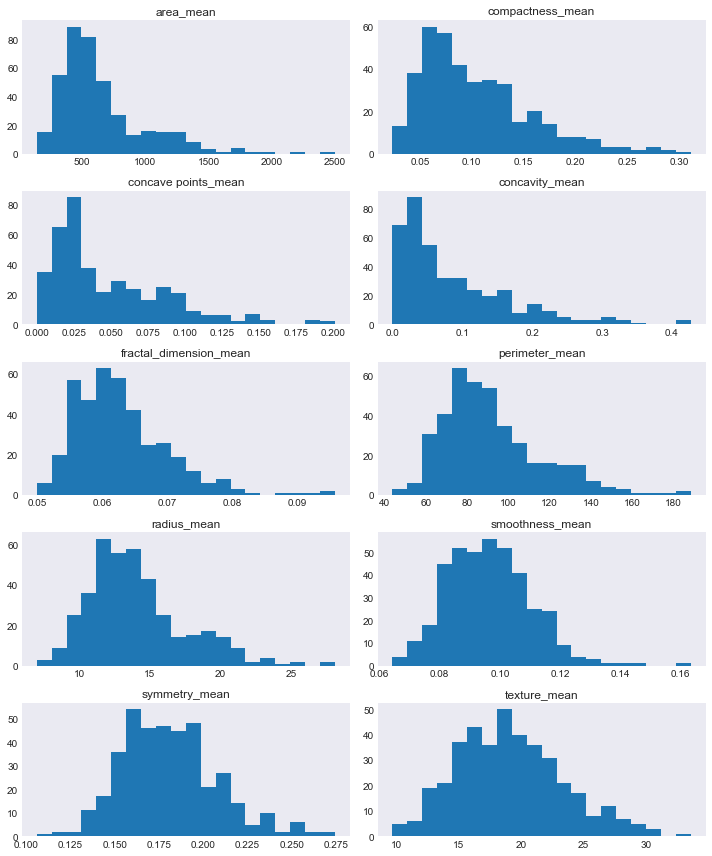

In [16]:
eda_helper.check_skewness(train,mean_feats)
eda_helper.show_histogram(train,mean_feats)

We can see that some features are pretty skewed. We can measure its skewness using pandas skew method and we can try comparing it to a log transformation of the same values to see if we can reduce the skewness.

In [17]:
log_means = np.log1p(train.iloc[:,1:11])

skewness = pd.DataFrame({'Original Skewness':train.iloc[:,1:11].skew(),
                         'Log Transformed':log_means.skew()})
skewness['Skewness Reduction'] = skewness['Original Skewness'] - skewness['Log Transformed']
skewness

Original Skewness  Log Transformed  Skewness Reduction
radius_mean                      1.004761         0.377833            0.626927
texture_mean                     0.455351        -0.092339            0.547690
perimeter_mean                   1.044661         0.355876            0.688785
area_mean                        1.697744         0.300113            1.397631
smoothness_mean                  0.584521         0.533206            0.051315
compactness_mean                 1.140656         1.014211            0.126445
concavity_mean                   1.498846         1.300044            0.198802
concave points_mean              1.254827         1.161099            0.093728
symmetry_mean                    0.606612         0.532908            0.073704
fractal_dimension_mean           1.272516         1.241934            0.030582

radius_se               3.079627
texture_se              1.982739
perimeter_se            3.463018
area_se                 4.918490
smoothness_se           1.902526
compactness_se          2.112998
concavity_se            5.788712
concave points_se       1.663144
symmetry_se             1.740279
fractal_dimension_se    4.318877
dtype: float64


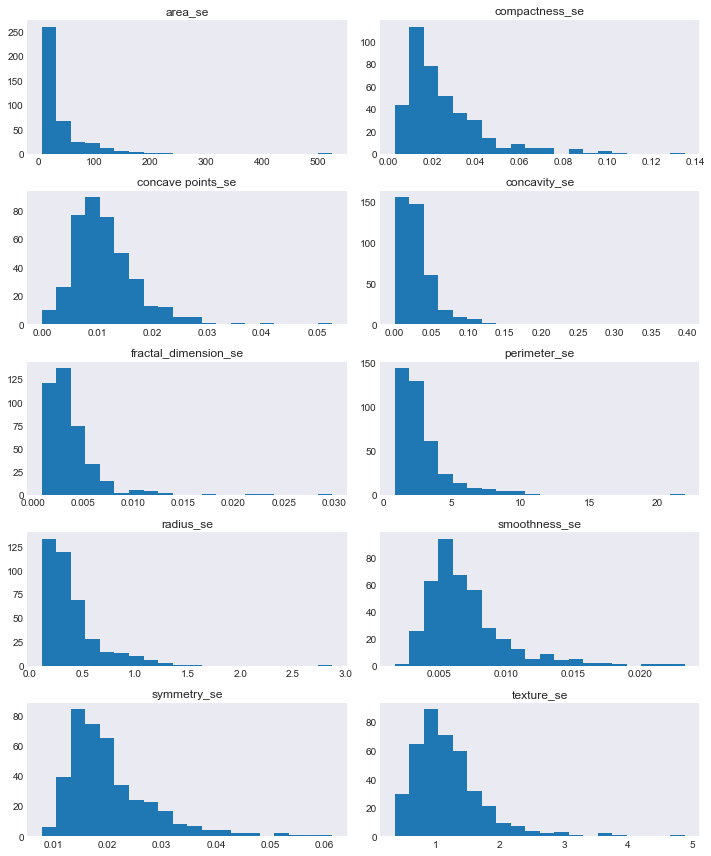

In [18]:
eda_helper.check_skewness(train,error_feats)
eda_helper.show_histogram(train,error_feats)

In [19]:
log_means = np.log1p(train.iloc[:,11:21])

skewness = pd.DataFrame({'Original Skewness':train.iloc[:,11:21].skew(),
                         'Log Transformed':log_means.skew()})
skewness['Skewness Reduction'] = skewness['Original Skewness'] - skewness['Log Transformed']
skewness

Original Skewness  Log Transformed  Skewness Reduction
radius_se                      3.079627         1.748615            1.331011
texture_se                     1.982739         0.787868            1.194871
perimeter_se                   3.463018         1.084497            2.378521
area_se                        4.918490         0.877223            4.041268
smoothness_se                  1.902526         1.886518            0.016008
compactness_se                 2.112998         2.020294            0.092704
concavity_se                   5.788712         4.712239            1.076473
concave points_se              1.663144         1.610665            0.052479
symmetry_se                    1.740279         1.704621            0.035658
fractal_dimension_se           4.318877         4.270209            0.048668

radius_worst               1.104636
texture_worst              0.478464
perimeter_worst            1.119315
area_worst                 1.729371
smoothness_worst           0.388613
compactness_worst          1.503862
concavity_worst            1.146496
concave points_worst       0.521604
symmetry_worst             1.140048
fractal_dimension_worst    1.684707
dtype: float64


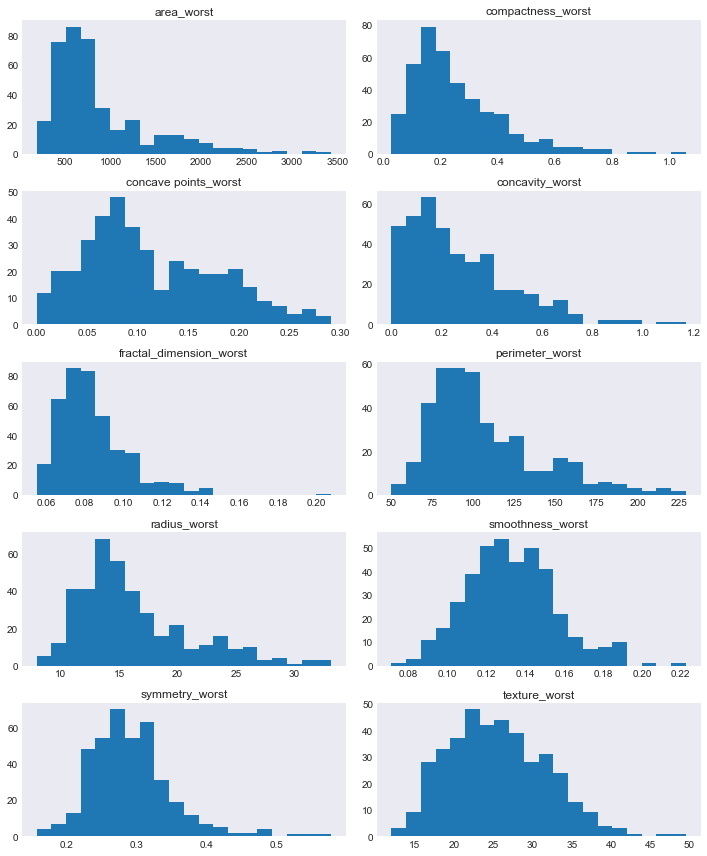

In [20]:
eda_helper.check_skewness(train,worst_feats)
eda_helper.show_histogram(train,worst_feats)

In [21]:
log_means = np.log1p(train.iloc[:,21:31])

skewness = pd.DataFrame({'Original Skewness':train.iloc[:,21:31].skew(),
                         'Log Transformed':log_means.skew()})
skewness['Skewness Reduction'] = skewness['Original Skewness'] - skewness['Log Transformed']
skewness

Original Skewness  Log Transformed  \
radius_worst                      1.104636         0.509649   
texture_worst                     0.478464        -0.104835   
perimeter_worst                   1.119315         0.467097   
area_worst                        1.729371         0.445815   
smoothness_worst                  0.388613         0.324117   
compactness_worst                 1.503862         1.092735   
concavity_worst                   1.146496         0.740750   
concave points_worst              0.521604         0.414964   
symmetry_worst                    1.140048         0.910234   
fractal_dimension_worst           1.684707         1.570535   

                         Skewness Reduction  
radius_worst                       0.594987  
texture_worst                      0.583299  
perimeter_worst                    0.652218  
area_worst                         1.283557  
smoothness_worst                   0.064496  
compactness_worst                  0.411128  
concavity_worst                    0.405746  
concave points_worst               0.106639  
symmetry_worst                     0.229814  
fractal_dimension_worst            0.114172

## Checking correlation

- We can use seaborn's amazing pairplot to give a first overview on all features and some pair interactions.
- By using heatmap we can see feature correlation. But now I am not removing any features based on correlation. We will decide later part

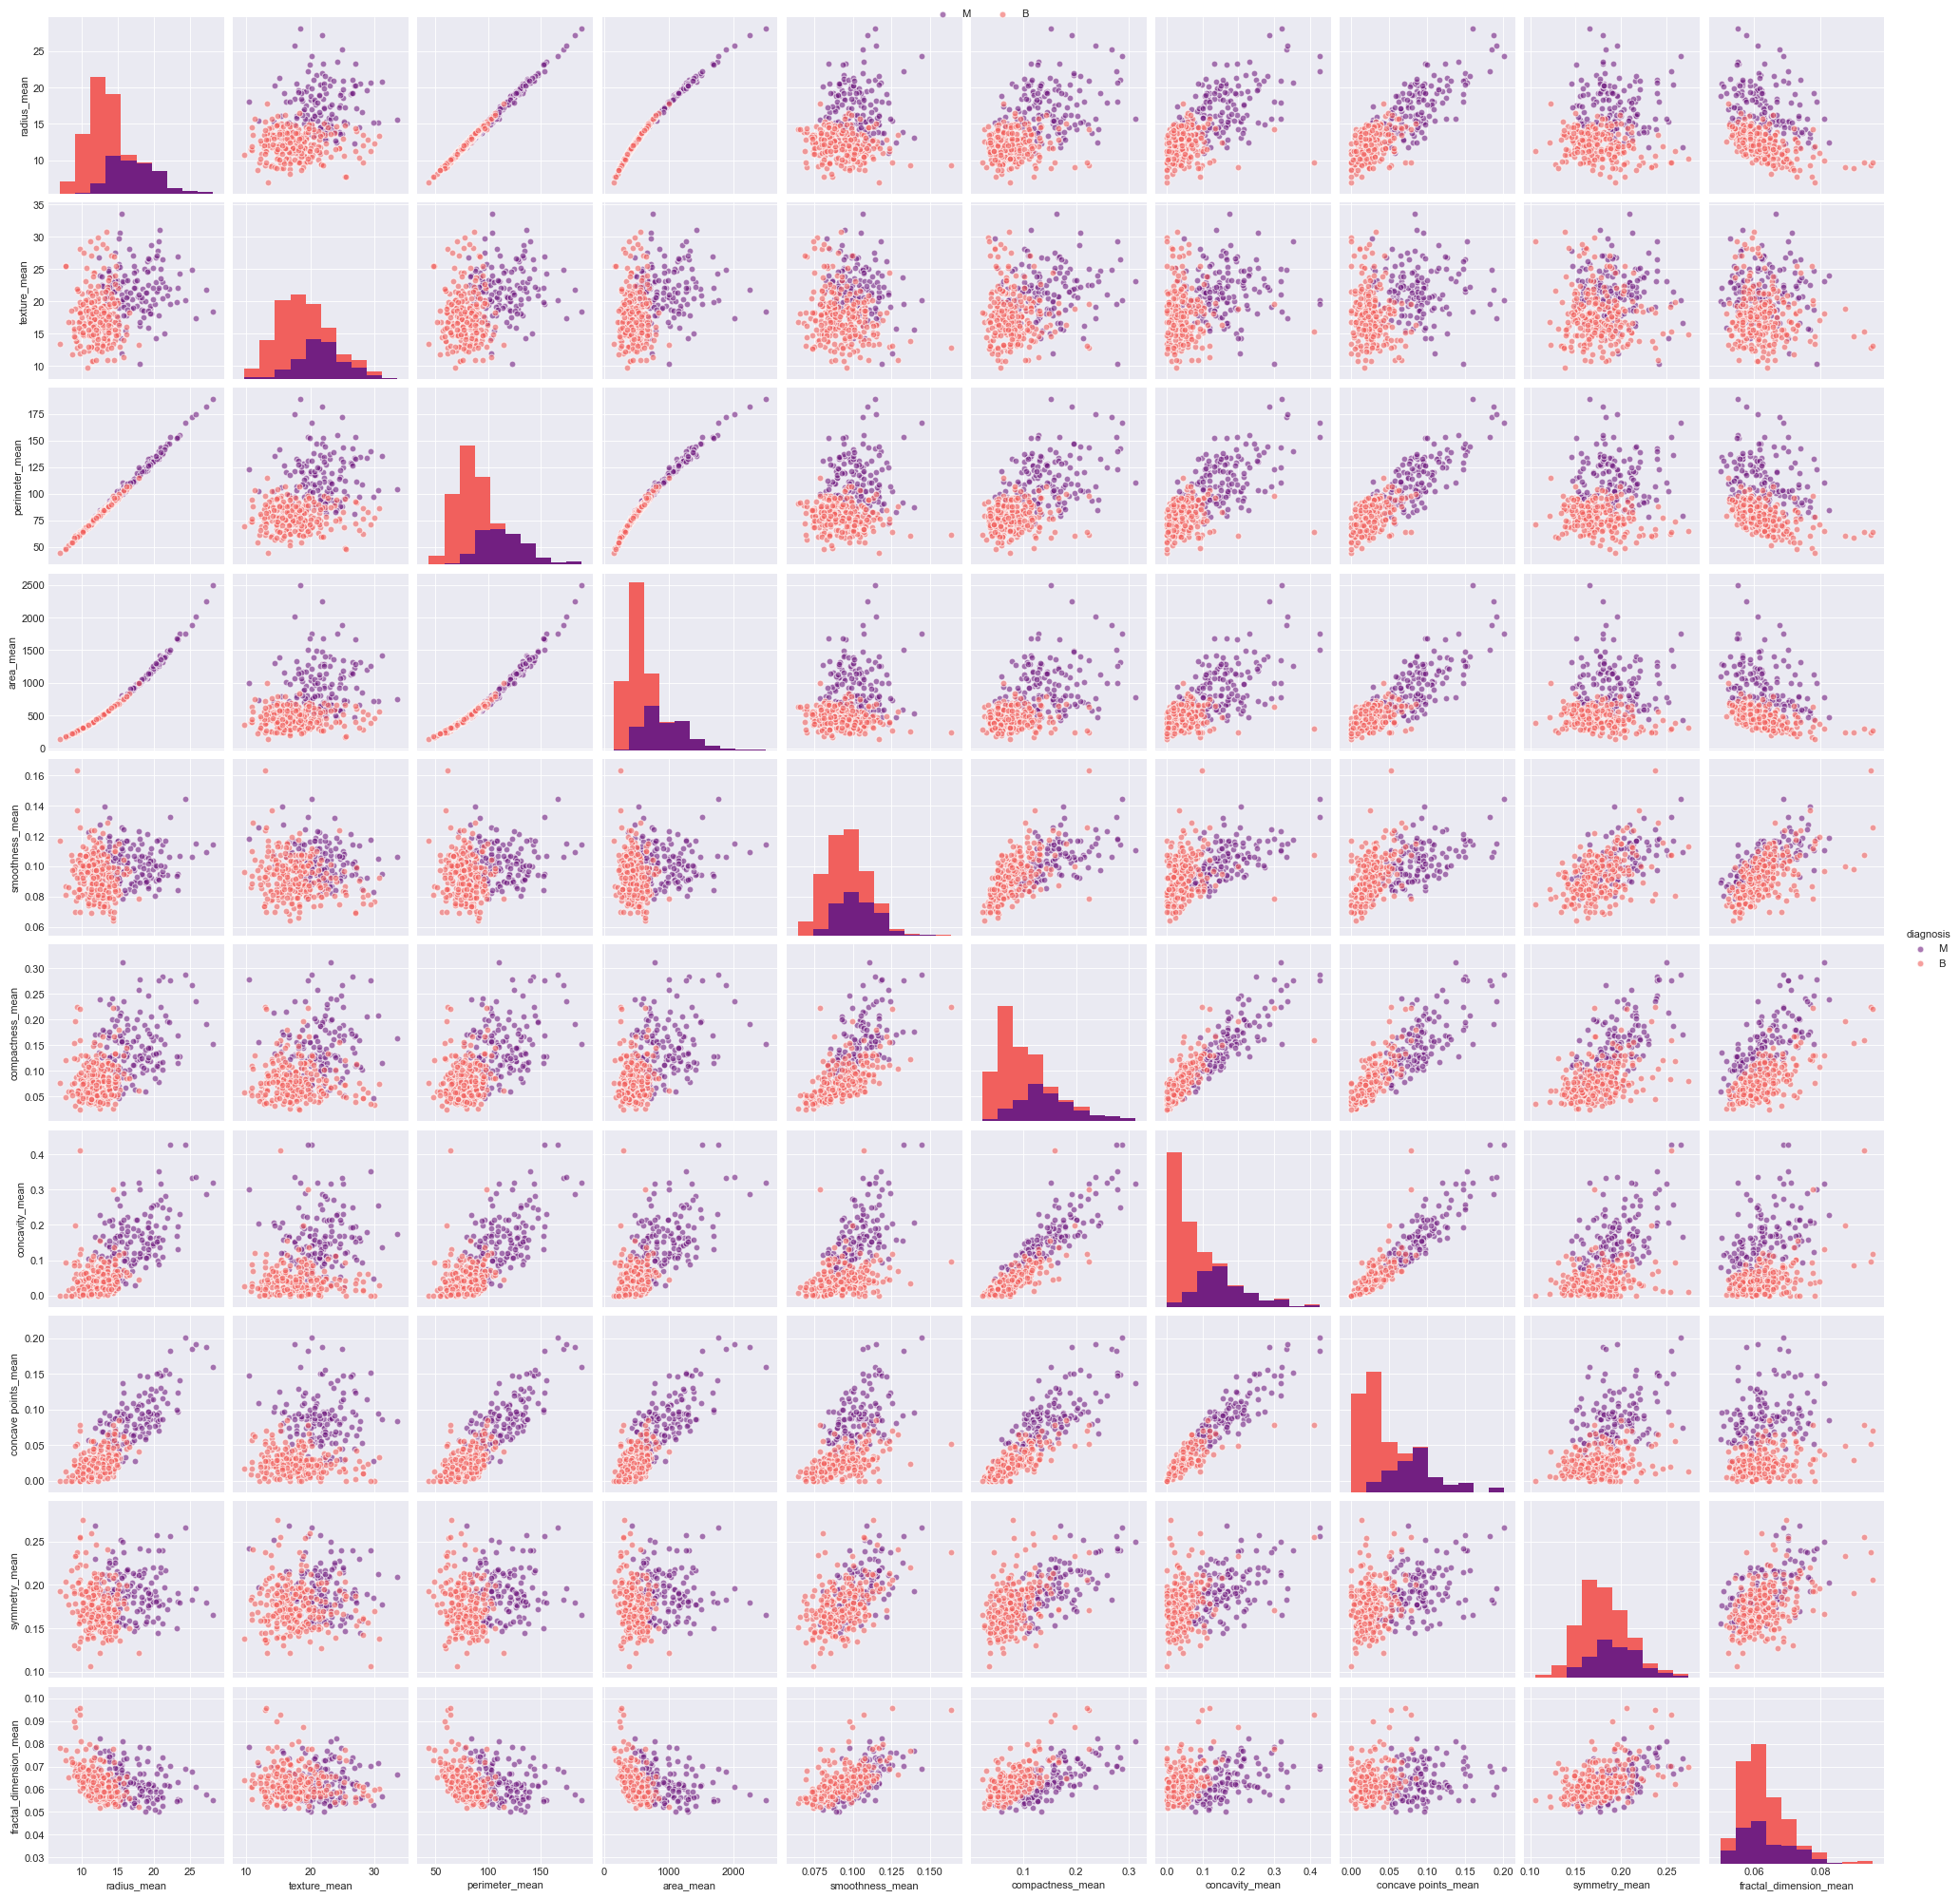

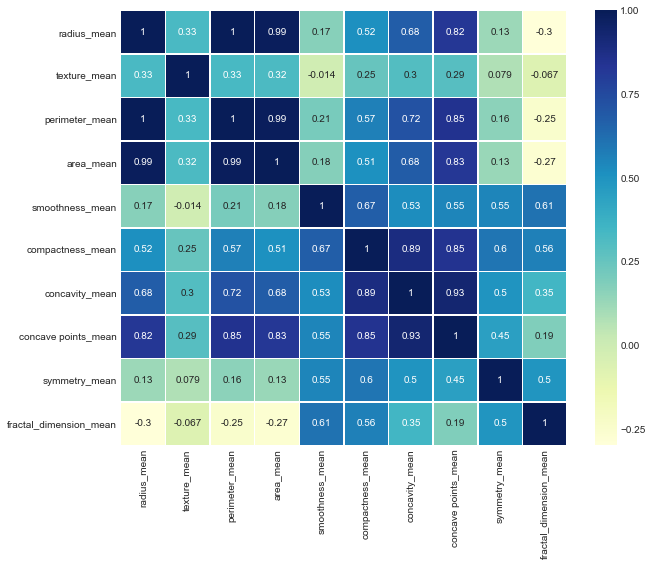

In [22]:
eda_helper.show_pairplots(train,mean_feats,hue_col='diagnosis')
eda_helper.show_heatmap(train[mean_feats])
#mean_feats

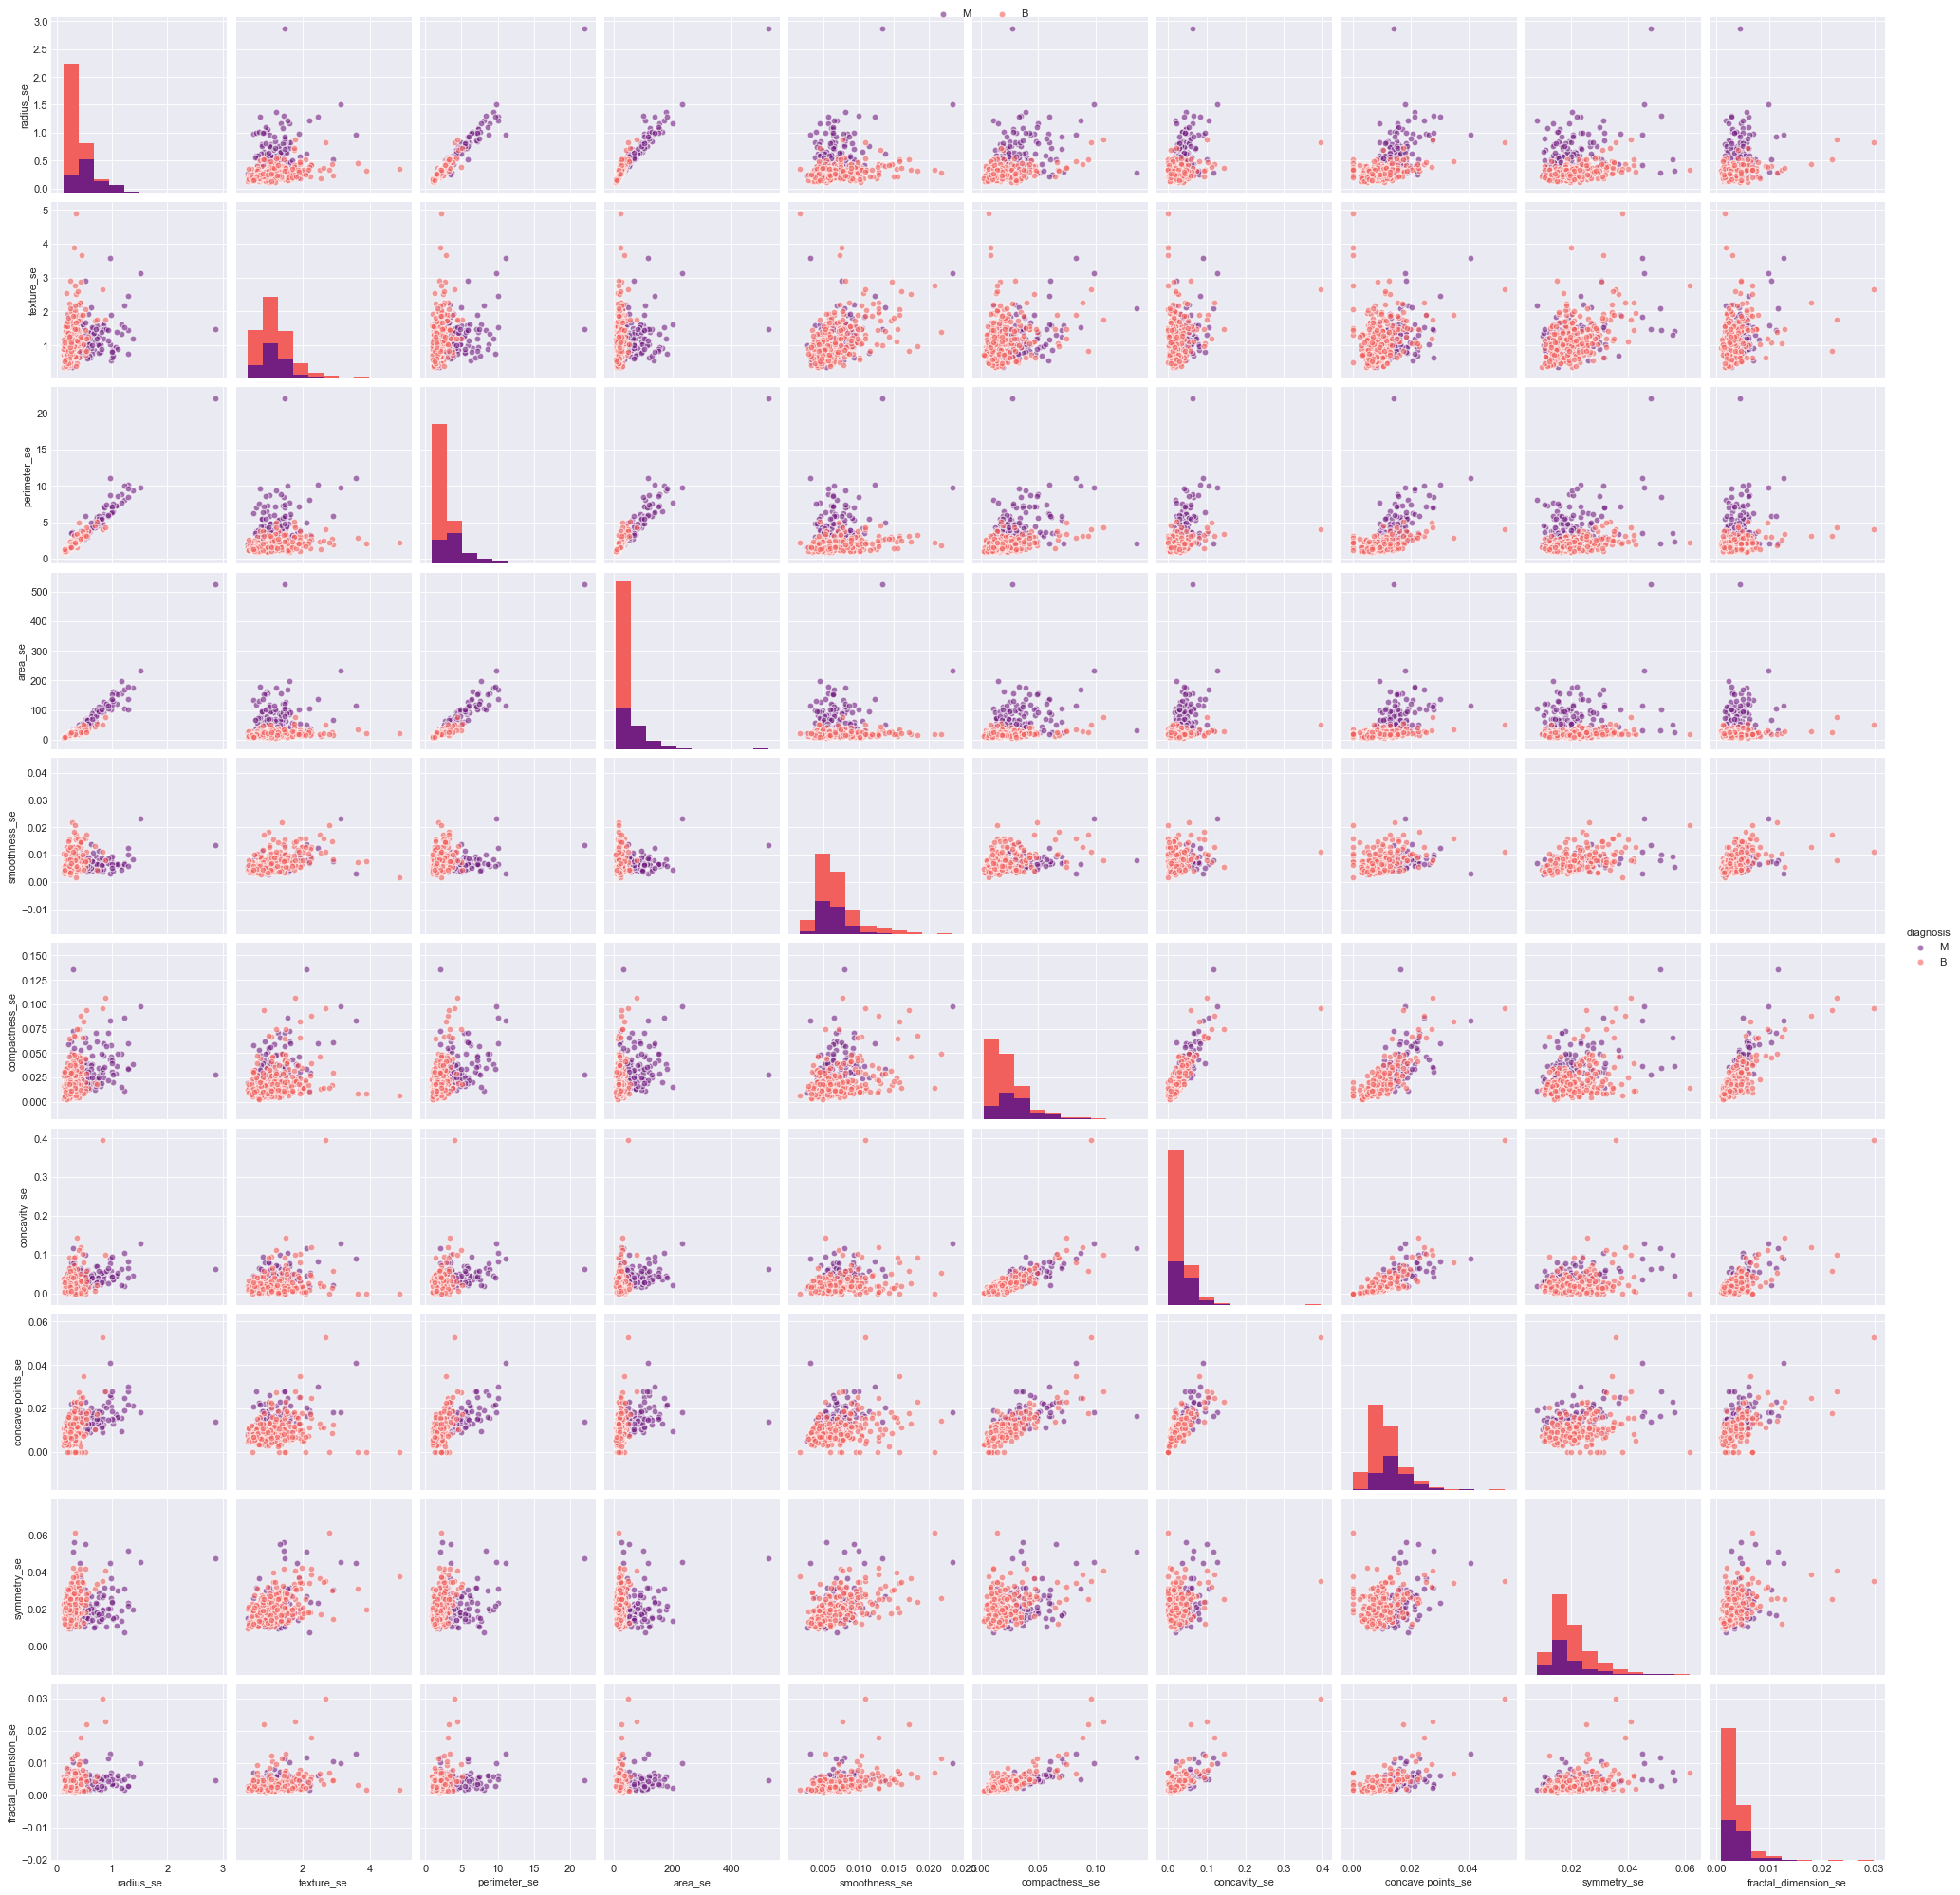

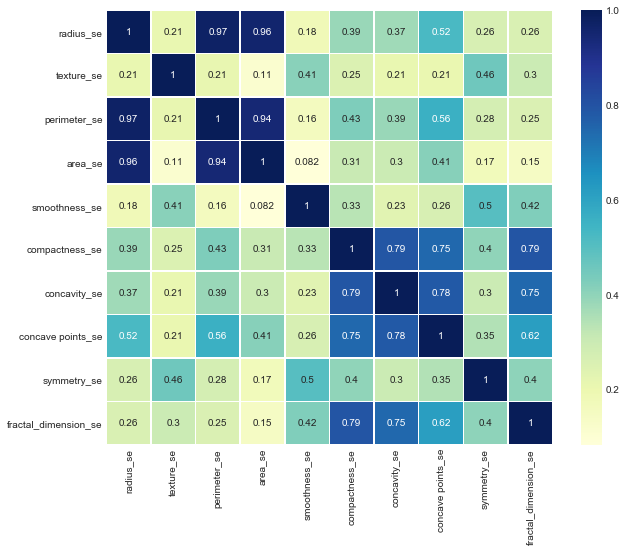

In [23]:
eda_helper.show_pairplots(train,error_feats,hue_col='diagnosis')
eda_helper.show_heatmap(train[error_feats])

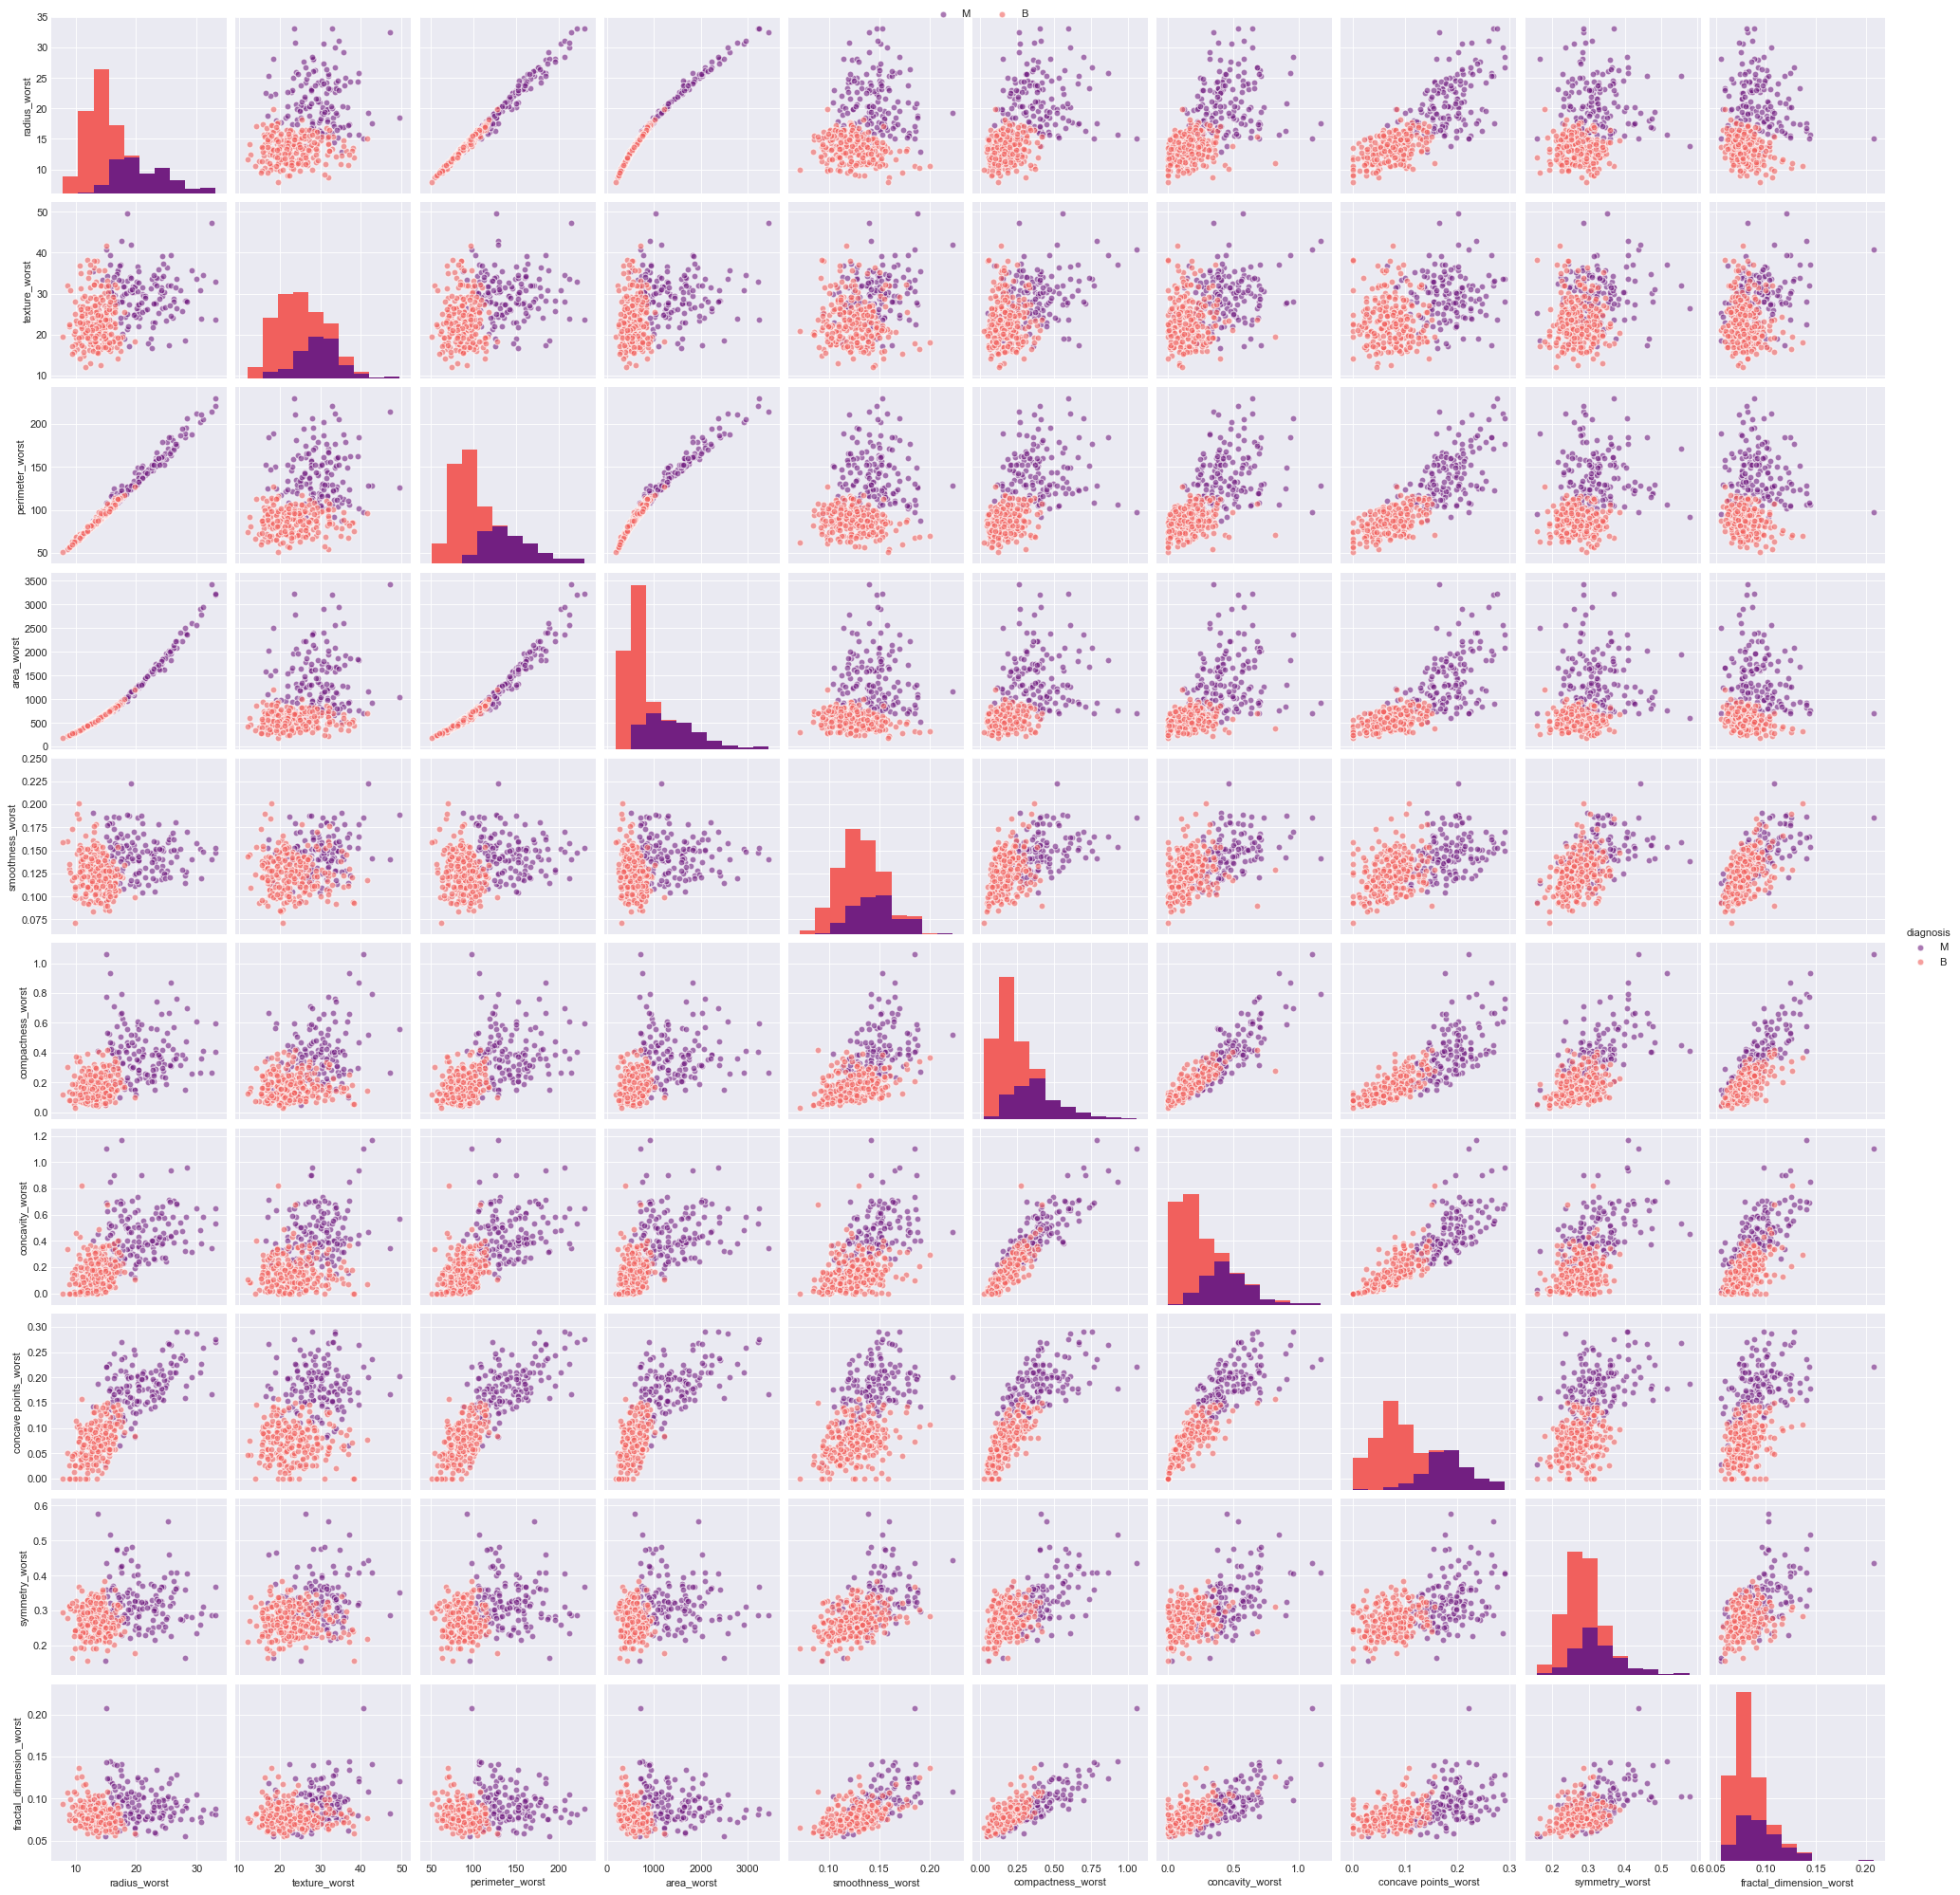

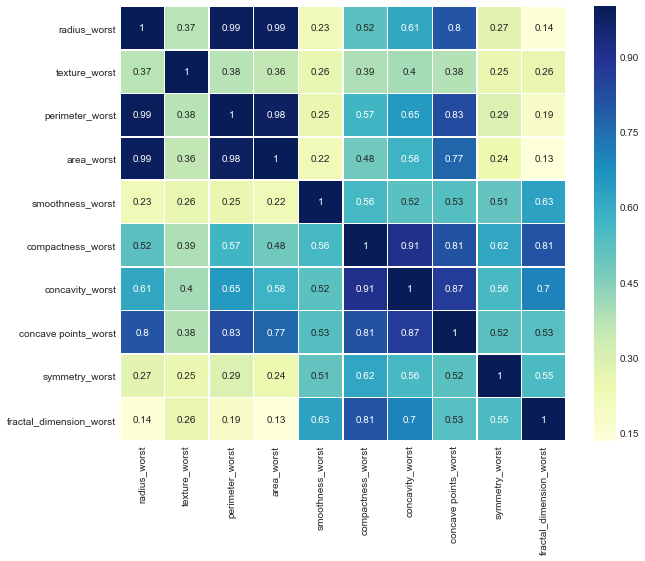

In [24]:
eda_helper.show_pairplots(train,worst_feats,hue_col='diagnosis')
eda_helper.show_heatmap(train[worst_feats])

## Correlaton on Target

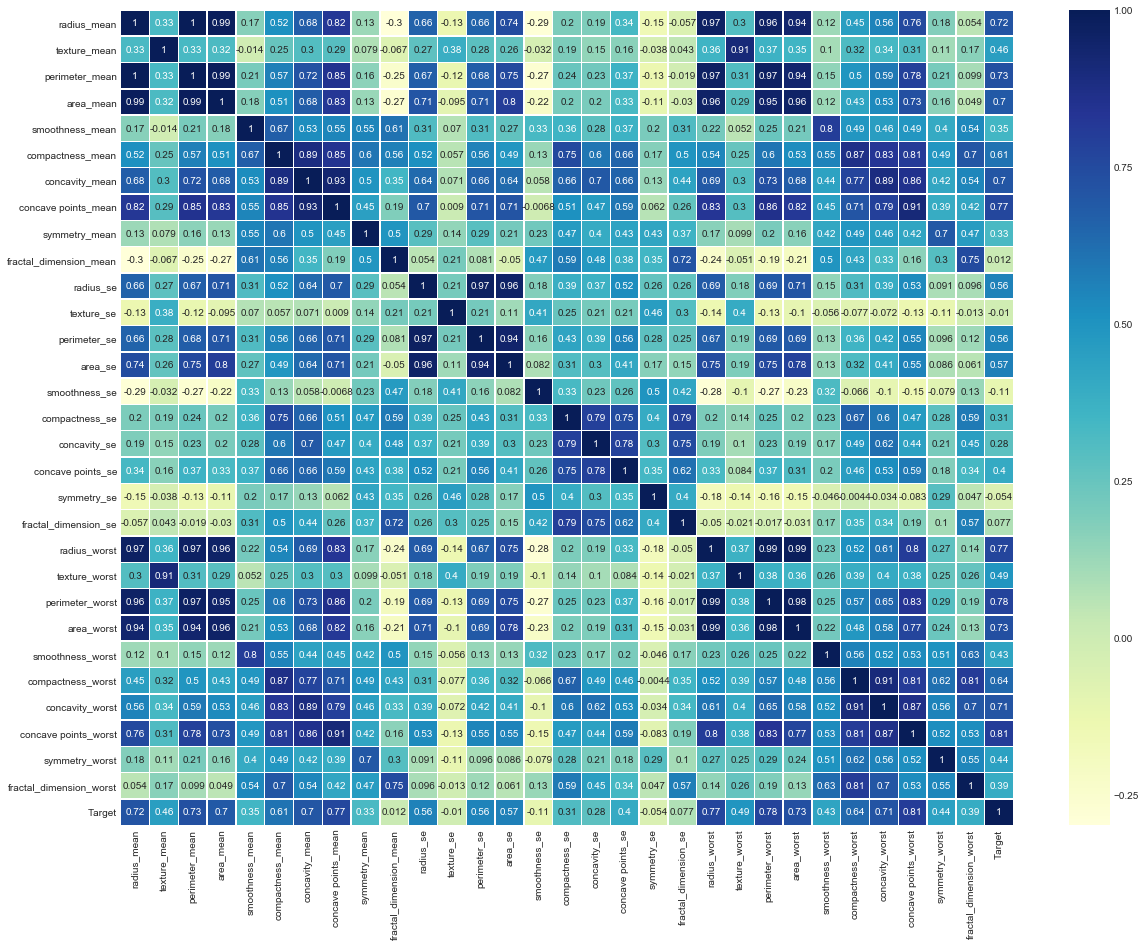

In [25]:
fig, ax = plt.subplots(figsize=(20,15)) 
ax = sns.heatmap(train.corr(), cmap="YlGnBu",annot=True, linewidths=.5, ax=ax)

In [26]:
corrs = train.corr()[["Target"]].sort_values("Target",ascending=False)[1:].reset_index()
corrs

index    Target
0      concave points_worst  0.805743
1           perimeter_worst  0.781024
2              radius_worst  0.769731
3       concave points_mean  0.765903
4                area_worst  0.733962
5            perimeter_mean  0.730885
6               radius_mean  0.715728
7           concavity_worst  0.711999
8            concavity_mean  0.701971
9                 area_mean  0.695174
10        compactness_worst  0.642147
11         compactness_mean  0.607747
12                  area_se  0.565331
13                radius_se  0.560965
14             perimeter_se  0.557789
15            texture_worst  0.493848
16             texture_mean  0.455633
17           symmetry_worst  0.444281
18         smoothness_worst  0.427309
19        concave points_se  0.401322
20  fractal_dimension_worst  0.391125
21          smoothness_mean  0.348133
22            symmetry_mean  0.326594
23           compactness_se  0.311711
24             concavity_se  0.276877
25     fractal_dimension_se  0.076704
26   fractal_dimension_mean  0.011681
27               texture_se -0.010410
28              symmetry_se -0.054227
29            smoothness_se -0.110467

In [27]:
def feat_class(feat):
    if 'worst' in feat:
        return 'Worst'
    elif 'mean' in feat:
        return 'Mean'
    elif 'se' in feat:
        return 'Standard Error'

In [28]:
corrs.rename(columns={'index':'Features'}, inplace=True)
corrs['Class'] = corrs['Features'].apply(feat_class)


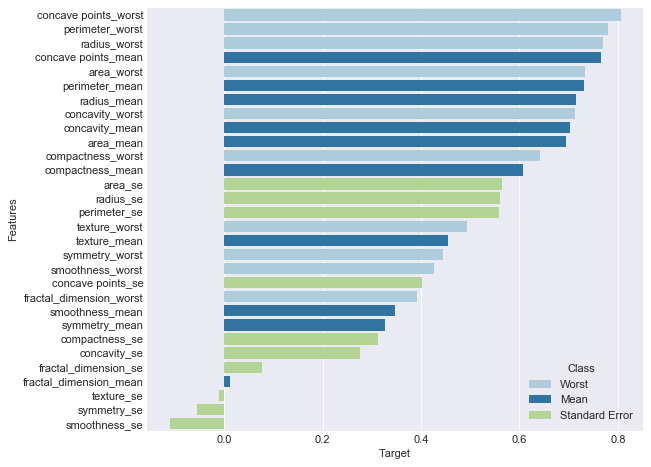

In [29]:
fig, ax = plt.subplots(figsize=(8,7), dpi=80)
sns.barplot(data=corrs, x='Target', y='Features', ax=ax,hue='Class', dodge=False, palette='Paired')

<b>Insights from the plots</b>:

- The two highest correlated feature types are WORST and MEAN and the lowest is the STANDARD ERROR.
- But now we can't see how the combination of features influence in our target. I am keep them and let my model decide.

## Initial Models

On this section we will:
- Pick different out-of-the-box models and evaluate them in our training data. My idea here is to try linear, tree based adn ensemble models. Most of the selected models provide feature importance information.
- See if the first results give us any tips on how to improve our data somehow and test some ideas (feature engineering)
- Choose the top five most promising and distinct models
- We have small datasets in our hand. For to get most outof it we use cross-validation technique

The models we will be using are:
- Logistic Regression
- Support Vector Classifier (SVC)
- Decision Tree
- Random Forests
- Gradient Boos Classifier
- AdaBoost Classifier
- XGB
- K-Nearest Neighbors

In [30]:
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Importing other tools
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [31]:
# Defining random seed
seed=123

# Creating Models
logreg = LogisticRegression(solver='lbfgs', random_state=seed)
svc = SVC(random_state=seed, probability=True)
dtree = DecisionTreeClassifier(random_state=seed)
rf = RandomForestClassifier(10, random_state=seed)
gdb = GradientBoostingClassifier(random_state=seed)
adb = AdaBoostClassifier(random_state=seed)
xgb = XGBClassifier(random_state=seed)
knn = KNeighborsClassifier()

first_models = [logreg, svc, dtree, rf, gdb, adb, xgb, knn]
first_model_names = ['Logistic Regression', 'SVC','Decision Tree', 
                     'Random Forest', 'GradientBoosting',
                        'AdaBoost', 'XGB', 'K-Neighbors'] 

# Defining other steps
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, random_state=seed)
std_sca = StandardScaler()

In [32]:
X_train = train.drop(['diagnosis', 'Target'] ,axis=1)
y_train = train['Target']

## Model Evaluation

### Choosing the Proper Measure to Evaluate the Model Performance
There are **a lot** of ways to measure the quality of your model and we must choose it carefully. This is one of the most important parts of a Machine Learning Project.

Our objective isn't classifying correctly the tumors. If that was the case simply using Accuracy - which is the ratio of correctly predicted classes - would do the job.

However, the objective of this analysis is **detecting malignant tumors**. And how do we measure that? Not with Accuracy, but with **RECALL**. 

Recall answers the following question: *from all the malignant tumors in our data, how many did we catch?*. Recall is calculated by dividing the True positives by the total number of positives (positive = malignant). It is important to realize that a high Recall doesn't mean a high Accuracy and there is often a trade-off between different performance measures. 

That said, we will be making our decisions based on Recall but we will also measure Accuracy to see the difference between them. Moving on!

<img src="Precision_recall.png" width="500" height="300"/>

### Coding Explanation:

The code on the cell below does the following steps:
* Setting up:
    1. Creates an array to store the out-of-fold predictions that we will use later on. Its shape is the training size by the number of models we have;
    2. Creates a list to store the Accuracy and Recall scores
* Outer Loop: Iterating through Models
    1. Creates a data pipeline with the scaler and the model
    - Creates two arrays to store each fold's accuracy and recall
    - Executes the inner loop
    - By the end of the cross-validation, stores the mean and the standard deviation for those two measures in the scores list
* Inner Loop: Cross-Validation
    1. Splits the training data into train/validation data
    2. Fits the model with the CV training data and predicts the validation data
    3. Stores the out-of-fold predictions (which is the validation predictions) in oof_preds
    4. Measures the Accuracy and Recall for the fold and stores in an array

In [33]:
def initial_model(X_train,y_train):
    
    train_size = X_train.shape[0]
    n_models = len(first_models)
    oof_pred = np.zeros((train_size, n_models))
    scores = []

    for n, model in enumerate(first_models):
        model_pipeline = Pipeline(steps=[('Scaler', std_sca),
                                         ('Estimator', model)])
        accuracy = np.zeros(n_folds)
        recall = np.zeros(n_folds)

        for i, (train_ix, val_ix) in enumerate(skf.split(X_train, y_train)):
            x_tr,  y_tr  = X_train.iloc[train_ix], y_train.iloc[train_ix]
            x_val, y_val = X_train.iloc[val_ix],   y_train.iloc[val_ix]

            model_pipeline.fit(x_tr, y_tr)
            val_pred = model_pipeline.predict(x_val)

            oof_pred[val_ix, n] = model_pipeline.predict_proba(x_val)[:,1]

            fold_acc = accuracy_score(y_val, val_pred)
            fold_rec = recall_score(y_val, val_pred)

            accuracy[i] = fold_acc
            recall[i] = fold_rec

        scores.append({'Accuracy'          : accuracy.mean(),
                       'Recall'            : recall.mean()})
    return scores,oof_pred

### Initial Model Evaluation

In [34]:
scores,oof_pred = initial_model(X_train,y_train)

In [35]:
measure_cols = ['Accuracy', 'Recall']

first_scores = pd.DataFrame(columns=measure_cols)

for name, score in zip(first_model_names, scores):
    
    new_row = pd.Series(data=score, name=name)
    first_scores = first_scores.append(new_row)
    
first_scores = first_scores.sort_values('Recall', ascending=False)
first_scores

Accuracy    Recall
Logistic Regression  0.984968  0.966437
SVC                  0.977468  0.953103
AdaBoost             0.959810  0.939770
XGB                  0.954778  0.939770
GradientBoosting     0.959778  0.939310
Decision Tree        0.932057  0.926207
K-Neighbors          0.964842  0.926207
Random Forest        0.952278  0.912874

This table shows us each model ordered by its Recall, descending.

** Insights **:
- Logistic Regression and SVC got the highest scores, while KNN and Random Forest the lowest.
- Most of the got above 95% accuracy and 91% recall on a first try.

## Feature Selection

Most models provide a method that returns feature importances or coefficients so we can have an idea of what is being considered the most important features of our dataset. SVC and KNN are the ones that don't have it.

Let's see if we can find anything from the other models preferences.

In [36]:
def feat_imp():
    feature_names = X_train.columns
    feat_imp_df = pd.DataFrame(columns=first_model_names, index=feature_names)

    # Dropping the Models that don't have feature importances for this analysis
    feat_imp_df.drop(['SVC', 'K-Neighbors'], axis=1, inplace=True)

    feat_imp_df['Logistic Regression'] = np.abs(logreg.coef_.ravel())
    feat_imp_df['Decision Tree'] = dtree.feature_importances_
    feat_imp_df['Random Forest'] = rf.feature_importances_
    feat_imp_df['GradientBoosting'] = gdb.feature_importances_
    feat_imp_df['AdaBoost'] = adb.feature_importances_
    feat_imp_df['XGB'] = xgb.feature_importances_
    
    return feat_imp_df

In [37]:
feat_imp_df = feat_imp()

In [38]:
feat_imp_df.head()

Logistic Regression  Decision Tree  Random Forest  \
radius_mean                 0.587554       0.008936       0.025565   
texture_mean                0.724613       0.046999       0.002599   
perimeter_mean              0.562957       0.000000       0.000428   
area_mean                   0.586506       0.013003       0.011784   
smoothness_mean             0.038324       0.000000       0.006390   

                 GradientBoosting  AdaBoost       XGB  
radius_mean              0.002851      0.00  0.028953  
texture_mean             0.050453      0.12  0.020597  
perimeter_mean           0.000020      0.00  0.000000  
area_mean                0.026181      0.06  0.033665  
smoothness_mean          0.008216      0.00  0.012285

> So this is how our table looks like right now. Each model has its own measure for each feature's importances. You will notice that some measures are in different scales. 

> In order to compare the importances between the models we need to scale them. I will use sklearn MinMaxScaler to shrink them to a [0, 1] interval and then sum the features importances for each model.

In [39]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

scaled_fi = pd.DataFrame(data=mms.fit_transform(feat_imp_df),
                         columns=feat_imp_df.columns,
                         index=feat_imp_df.index)
scaled_fi['Overall'] = scaled_fi.sum(axis=1)

In [40]:
scaled_fi.head()

Logistic Regression  Decision Tree  Random Forest  \
radius_mean                 0.479929       0.011993       0.099117   
texture_mean                0.595985       0.063078       0.010077   
perimeter_mean              0.459102       0.000000       0.001659   
area_mean                   0.479042       0.017451       0.045687   
smoothness_mean             0.014863       0.000000       0.024774   

                 GradientBoosting  AdaBoost       XGB   Overall  
radius_mean              0.004170       0.0  0.057259  0.652468  
texture_mean             0.073802       1.0  0.040734  1.783676  
perimeter_mean           0.000030       0.0  0.000000  0.460790  
area_mean                0.038297       0.5  0.066577  1.147054  
smoothness_mean          0.012018       0.0  0.024295  0.075950

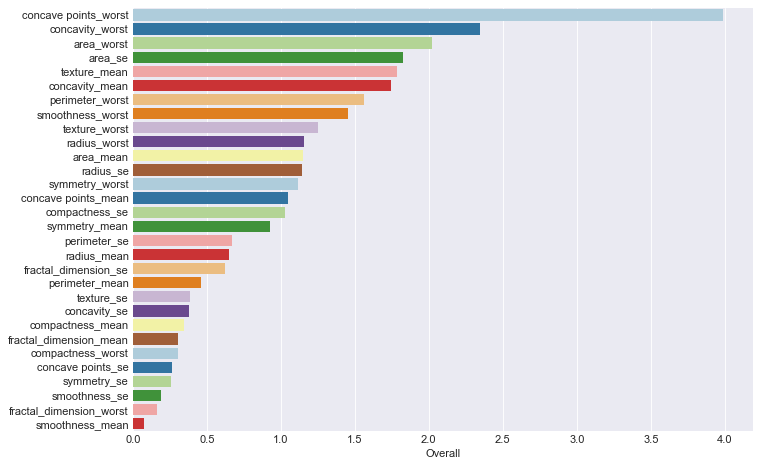

In [41]:
ordered_ranking = scaled_fi.sort_values('Overall', ascending=False)
fig, ax = plt.subplots(figsize=(10,7), dpi=80)
sns.barplot(data=ordered_ranking, y=ordered_ranking.index, x='Overall', palette='Paired')

**Insights**:
- Worst Perimeter is the most important features between models;
- There is a clear preference for Worst features on models. The top 3 features are 'Worst';
- From bottom se features are majority.   

This is what our models have to tell us. If we decided on dropping features based on the correlations plotted we would've gotten some of them wrong. 

Let's try now removing the Bottom 5 and repeat the training to see if we get any better results. 

In [42]:
train_v2 = train.drop(ordered_ranking.index[:-6:-1], axis=1)
test_v2 = test.drop(ordered_ranking.index[:-6:-1], axis=1)

X_train_v2 = train_v2.drop(['diagnosis', 'Target'] ,axis=1)
X_test_v2 = test_v2.drop(['diagnosis', 'Target'] ,axis=1)


In [43]:
scores_v2,oof_pred_v2 =initial_model(X_train_v2,y_train)

In [44]:
measure_cols = ['Accuracy', 'Recall']

fs_scores = pd.DataFrame(columns=measure_cols)

for name, score in zip(first_model_names, scores_v2):
    
    new_row = pd.Series(data=score, name=name)
    fs_scores = fs_scores.append(new_row)
    
fs_scores = fs_scores.sort_values('Recall', ascending=False)

d={'First Scores':first_scores, 'Less Features':fs_scores}
pd.concat(d, axis=1, sort=False)

First Scores           Less Features          
                        Accuracy    Recall      Accuracy    Recall
Logistic Regression     0.984968  0.966437      0.987468  0.973103
SVC                     0.977468  0.953103      0.977468  0.953103
AdaBoost                0.959810  0.939770      0.957310  0.939770
XGB                     0.954778  0.939770      0.954778  0.939770
GradientBoosting        0.959778  0.939310      0.949778  0.919310
Decision Tree           0.932057  0.926207      0.927057  0.912644
K-Neighbors             0.964842  0.926207      0.967373  0.919310
Random Forest           0.952278  0.912874      0.944778  0.899310

**Insights from Feature Selection**:

- What changed?
    - Logistic Regression imporved and leading for now
    - SVC, AdaBoost and XGB didn't change at all
    - KNN, Decision Tree, RF and GradientBoosting got worst;
    

<b>It is not clear if removing the features was a good decision or not. When in doubt, opt for the simpler choice: We are removing them.</b>


In [45]:
oof_pred_v2

array([[9.99363460e-01, 9.95038793e-01, 1.00000000e+00, ...,
        8.50197375e-01, 9.98717070e-01, 1.00000000e+00],
       [6.81488675e-03, 1.84277708e-03, 0.00000000e+00, ...,
        3.13835318e-01, 2.46623927e-03, 0.00000000e+00],
       [1.13078616e-01, 2.83597775e-02, 0.00000000e+00, ...,
        4.14965816e-01, 8.63207132e-02, 0.00000000e+00],
       ...,
       [9.99999985e-01, 9.99999993e-01, 1.00000000e+00, ...,
        8.27588424e-01, 9.98928010e-01, 1.00000000e+00],
       [1.28321707e-04, 5.87169805e-04, 0.00000000e+00, ...,
        1.83382098e-01, 4.42637084e-03, 0.00000000e+00],
       [9.99999400e-01, 9.99989823e-01, 1.00000000e+00, ...,
        7.77929785e-01, 9.98627067e-01, 1.00000000e+00]])

In [46]:
oof_dataframe = pd.DataFrame(data=oof_pred_v2, columns=first_model_names, index=train.index)
oof_dataframe['Target'] = train['Target']
#oof_dataframe = oof_dataframe.drop(['LDA', 'Decision Tree', 'Linear SVC'], axis=1)

In [47]:
oof_dataframe.sample(10)

Logistic Regression       SVC  Decision Tree  Random Forest  \
46              0.000005  0.000237            0.0            0.0   
561             0.000064  0.104990            0.0            0.0   
19              0.050190  0.010924            0.0            0.1   
105             0.928015  0.956750            1.0            1.0   
537             0.052559  0.331050            1.0            0.0   
263             0.292385  0.352068            0.0            0.4   
110             0.000092  0.000113            0.0            0.0   
479             0.961608  0.992071            1.0            1.0   
26              0.999662  0.999999            1.0            0.9   
384             0.002063  0.000472            0.0            0.0   

     GradientBoosting  AdaBoost       XGB  K-Neighbors  Target  
46           0.000122  0.280092  0.001546          0.0       0  
561          0.000524  0.312247  0.010018          0.0       0  
19           0.006081  0.420171  0.049228          0.0       0  
105          0.972913  0.593724  0.921359          1.0       1  
537          0.028725  0.261045  0.107715          0.8       0  
263          0.399393  0.397946  0.283728          0.2       1  
110          0.000314  0.264554  0.001673          0.0       0  
479          0.999235  0.758039  0.989072          1.0       1  
26           0.999371  0.640815  0.997444          1.0       1  
384          0.000152  0.206738  0.001366          0.0       0

Lets see if we can find examples that all models got the classification wrong. The function defined below does just that.

In [48]:
def all_wrong(x):
    predictions = sum(x[:8])
    target = x[8]
    if (target == 1 and predictions == 0) or \
       (target == 0 and predictions == 7):
        return True
    
    else: return False

In [49]:
oof_dataframe['All_wrong'] = round(oof_dataframe).apply(all_wrong, axis=1)
oof_dataframe.query("All_wrong == True")

Logistic Regression       SVC  Decision Tree  Random Forest  \
413             0.806789  0.895718            1.0            0.6   
135             0.173433  0.077525            0.0            0.0   
263             0.292385  0.352068            0.0            0.4   
40              0.114599  0.118770            0.0            0.0   

     GradientBoosting  AdaBoost       XGB  K-Neighbors  Target  All_wrong  
413          0.964815  0.549891  0.924262          0.2       0       True  
135          0.000492  0.370706  0.013408          0.0       1       True  
263          0.399393  0.397946  0.283728          0.2       1       True  
40           0.000371  0.467400  0.003004          0.2       1       True

** I decided to tune further top 2 models based on Recall **
- Logistic Regression
- SVC


** Sklearn's GridSearchCV is our best friend for parameter tuning. **

In [50]:
from sklearn.model_selection import GridSearchCV

# function for tuning
def train_gridsearch(model, x=X_train_v2, y=y_train, name=None):
    t_model = model
    t_model.fit(x, y)
    print(30*'-')
    if name != None: print(name)
    print('\nBest Parameters:')
    for item in t_model.best_params_.items():
        print(item[0], ': ', item[1])
    print('\nScore: ', t_model.best_score_, '\n')
    print(30*'-')

In [51]:
from sklearn.base import BaseEstimator, TransformerMixin

class Logger(BaseEstimator, TransformerMixin):
    def __init__(self, apply_log = True):
        self.apply_log = apply_log
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        logX = X.copy()
        
        if self.apply_log:
            logX = np.log1p(X)
            return logX
    
        else: return X

logger = Logger()

## Logistic Regression Tuning


In [52]:
# Logistic Regression Initial Parameters
log_pams = [{'M__solver':['liblinear'],
             'M__class_weight':[None, 'balanced'],
             'M__C': [0.001, 0.01, 0.1, 1, 10, ],
             'M__penalty':['l1'], 
             'L__apply_log':[True, False]},
            {'M__solver':['lbfgs'],
             'M__class_weight':[None, 'balanced'],
             'M__C': [0.001, 0.01, 0.1, 1, 10, ],
             'M__penalty':['l2'], 
             'L__apply_log':[True, False]}]

log_pipe = Pipeline(steps=[('L', logger),
                           ('S', std_sca),
                           ('M', logreg)])

log_gs = GridSearchCV(log_pipe, log_pams, scoring='recall',cv=skf, n_jobs=-1, iid=False)

train_gridsearch(log_gs)

------------------------------

Best Parameters:
L__apply_log :  False
M__C :  10
M__class_weight :  None
M__penalty :  l1
M__solver :  liblinear

Score:  0.9797701149425289 

------------------------------


Our best C is at 10 so we might refine our parameters near that value. A second run on parameter tuning could look like:

In [53]:
# Logistic Regression Initial Parameters
log_pams = [{'M__solver':['liblinear'],
             'M__class_weight':[None],
             'M__C': [1,2,4, 7, 8],
             'M__penalty':['l1'], 
             'L__apply_log':[False]}]

# It is important to apply the log transformer before the scaling otherwise we will always get 'number near 0' error.
log_pipe = Pipeline(steps=[('L', logger),
                           ('S', std_sca),
                           ('M', logreg)])

log_gs = GridSearchCV(log_pipe, log_pams, scoring='recall',
                      cv=skf, n_jobs=-1, iid=False)

train_gridsearch(log_gs)

------------------------------

Best Parameters:
L__apply_log :  False
M__C :  7
M__class_weight :  None
M__penalty :  l1
M__solver :  liblinear

Score:  0.9797701149425289 

------------------------------


In [54]:
logreg_tuned = log_gs.best_estimator_

In [55]:
print(confusion_matrix(y_train, log_gs.predict(X_train_v2)))

[[250   0]
 [  2 146]]


Accuracy:  99.5%     
Recall: 98.65%


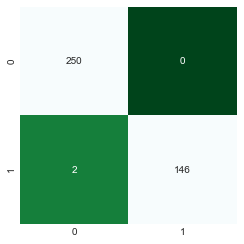

In [56]:
sns.heatmap(confusion_matrix(y_train, log_gs.predict(X_train_v2)),
                annot=True, square=True, cbar=False,
                fmt='.0f', cmap='BuGn_r', vmax=10)

print(f'Accuracy:  {100*accuracy_score(y_train, log_gs.predict(X_train_v2)):.4}% \
    \nRecall: {100*recall_score(y_train, log_gs.predict(X_train_v2)):.4}%')

Accuracy:  94.15%     
Recall: 92.19%


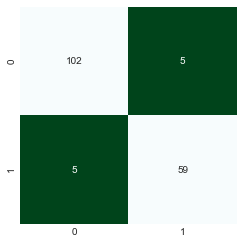

In [57]:
#test_v2.head()
y_test = test_v2['Target']

#X_test_scaled = std_sca.transform(X_test_v2)

sns.heatmap(confusion_matrix(y_test, log_gs.predict(X_test_v2)),fmt='.0f',annot=True, square=True, cbar=False,cmap='BuGn_r', vmax=10)

print(f'Accuracy:  {100*accuracy_score(y_test, log_gs.predict(X_test_v2)):.4}% \
    \nRecall: {100*recall_score(y_test, log_gs.predict(X_test_v2)):.4}%')



## SVC Tuning

In [58]:
# SVC Initial Parameters
svc_pams = [{'M__kernel':['rbf'],
             'M__class_weight':[None, 'balanced'],
             'M__C': [0.001, 0.01, 0.1, 1, 10, 100, 200],
             'M__gamma':['auto', 'scale', 0.001, 0.01, 0.1],
             'L__apply_log':[True, False]}]

# It is important to apply the log transformer before the scaling otherwise we will always get 'number near 0' error.
svc_pipe = Pipeline(steps=[('L', logger),
                           ('S', std_sca),
                           ('M', svc)])

svc_gs = GridSearchCV(svc_pipe, svc_pams, scoring='recall',
                      cv=skf, n_jobs=-1, iid=False, refit=True)

train_gridsearch(svc_gs)

------------------------------

Best Parameters:
L__apply_log :  True
M__C :  100
M__class_weight :  None
M__gamma :  0.01
M__kernel :  rbf

Score:  0.9797701149425289 

------------------------------


In [59]:
# SVC Second round Parameters
svc_pams = [{'M__kernel':['rbf'],
             'M__class_weight':[None, 'balanced'],
             'M__C': [0.05, 0.07, 0.1, 0.12, 0.15, 0.2,100,110],
             'M__gamma':[0.01],
             'L__apply_log':[True]}]

# It is important to apply the log transformer before the scaling otherwise we will always get 'number near 0' error.
svc_pipe = Pipeline(steps=[('L', logger),
                           ('S', std_sca),
                           ('M', svc)])

svc_gs = GridSearchCV(svc_pipe, svc_pams, scoring='recall',
                      cv=skf, n_jobs=-1, iid=False)

train_gridsearch(svc_gs)

------------------------------

Best Parameters:
L__apply_log :  True
M__C :  100
M__class_weight :  None
M__gamma :  0.01
M__kernel :  rbf

Score:  0.9797701149425289 

------------------------------


Accuracy:  99.5%     
Recall: 98.65%


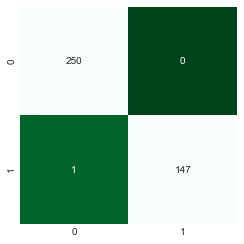

In [60]:
sns.heatmap(confusion_matrix(y_train, svc_gs.predict(X_train_v2)),
                annot=True, square=True, cbar=False,
                fmt='.0f', cmap='BuGn_r', vmax=10)

print(f'Accuracy:  {100*accuracy_score(y_train, log_gs.predict(X_train_v2)):.4}% \
    \nRecall: {100*recall_score(y_train, log_gs.predict(X_train_v2)):.4}%')

Accuracy:  95.91%     
Recall: 93.75%


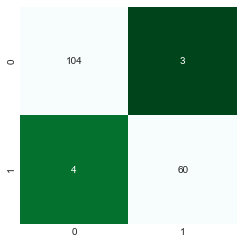

In [61]:
sns.heatmap(confusion_matrix(y_test, svc_gs.predict(X_test_v2)),
                annot=True, square=True, cbar=False,
                fmt='.0f', cmap='BuGn_r', vmax=10)

print(f'Accuracy:  {100*accuracy_score(y_test, svc_gs.predict(X_test_v2)):.4}% \
    \nRecall: {100*recall_score(y_test, svc_gs.predict(X_test_v2)):.4}%')



## Summary - Insights from the results 

* Logistic Regression on training data
    - Accuracy:  99.5%     
    - Recall: 98.65%

* Logistic Regression on testing data
    - Accuracy:  94.15%     
    - Recall: 92.19%

* SVC on training data
    - Accuracy:  99.5%     
    - Recall: 98.65%

* SVC on testing data
    - Accuracy:  95.91%     
    - Recall: 93.75%
    


* Both models got at least 92% recall - for this data this means 5 malignant tumors not detected
* Our best model SVC performed the best, with **93.75%** malgiinant tumors detected.